# Sparse Hebbian Learning: basics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 1, 10

In [5]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose)
data = shl.get_data(name_database='serre07_distractors')

Extracting data...Bdn_objn35.jpg, Mda_gre178.jpg, Fda_osun36.jpg, Fda_urb794.jpg, Bdn_text6.jpg, Hda_obj87.jpg, Hda_obj95.jpg, Bdn_text16.jpg, Mdn_natu302.jpg, Hda_obj324.jpg, Fdn_open4.jpg, Hdn_objn34.jpg, Bda_room40.jpg, Mda_art242.jpg, Fdn_sclos3.jpg, Bda_room141.jpg, Mdn_nat634.jpg, Mda_archi289.jpg, Hdn_N124065.jpg, Fda_art1465.jpg, Bda_room185.jpg, Mdn_land503.jpg, Bdn_land376.jpg, Fda_art1418.jpg, Mdn_N344039.jpg, Fda_A731012.jpg, Mda_art573.jpg, Hda_obj73.jpg, Hdn_objn115.jpg, Fdn_land135.jpg, Bdn_natu5.jpg, Mda_urb580.jpg, Bda_art671.jpg, Hda_obj404.jpg, Fdn_sharp22.jpg, Bda_enc89.jpg, Fda_gre479.jpg, Hdn_natu354.jpg, Hdn_objn22.jpg, Bdn_N44065.jpg, Hda_obj416.jpg, Fda_art36.jpg, Hdn_N115056.jpg, Mdn_text119.jpg, Bda_art642.jpg, Hda_obj176.jpg, Fdn_sclos4.jpg, Mda_art376.jpg, Fdn_land83.jpg, Hda_obj100.jpg, Fda_A805078.jpg, Bdn_text17.jpg, Mda_archi215.jpg, Mda_urb982.jpg, Fda_arnat64.jpg, Mda_art843.jpg, Fdn_nat168.jpg, Hdn_objn217.jpg

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (204800, 144)
average of patches =  2.45993426246e-19
average energy of patches =  1.0
std of the average of individual patches =  3.05522025711e-18


Extracting data...Bdn_land859.jpg, Hda_obj97.jpg, Mda_arnat105.jpg, Mdn_N228078.jpg, Mda_urb230.jpg, Fdn_open14.jpg, Bda_int211.jpg, Hda_obj89.jpg, Mda_art337.jpg, Fdn_land353.jpg, Bda_art1171.jpg, Hdn_objn213.jpg, Mda_gre163.jpg, Fda_art32.jpg, Hda_room425.jpg, Hda_obj343.jpg, Hda_int170.jpg, Mdn_natu462.jpg, Fdn_land241.jpg, Mda_art669.jpg, Bda_room133.jpg, Fda_A219084.jpg, Hdn_objn37.jpg, Bdn_text20.jpg, Hda_obj92.jpg, Fda_A463036.jpg, Hdn_objn44.jpg, Mda_gre321.jpg, Bda_int767.jpg, Fda_art336.jpg, Mdn_N291096.jpg, Fda_art1180.jpg, Fdn_nat376.jpg, Bda_room43.jpg, Mdn_nat367.jpg, Fdn_bea25.jpg, Fda_art36.jpg, Bda_int770.jpg, Fdn_for7.jpg, Fdn_land14.jpg, Fdn_sclos3.jpg, Fda_A487031.jpg, Mda_urb951.jpg, Fda_A803044.jpg, Hdn_objn115.jpg, Mda_archi277.jpg, Bda_room165.jpg, Bdn_natu350.jpg, Bda_art685.jpg, Fdn_nat1251.jpg, Mda_archi42.jpg, Bda_art1111.jpg, Mda_archi233.jpg, Hdn_objn41.jpg, Mda_art1312.jpg, Bdn_nat331.jpg, Fda_gre536.jpg, Bda_room1

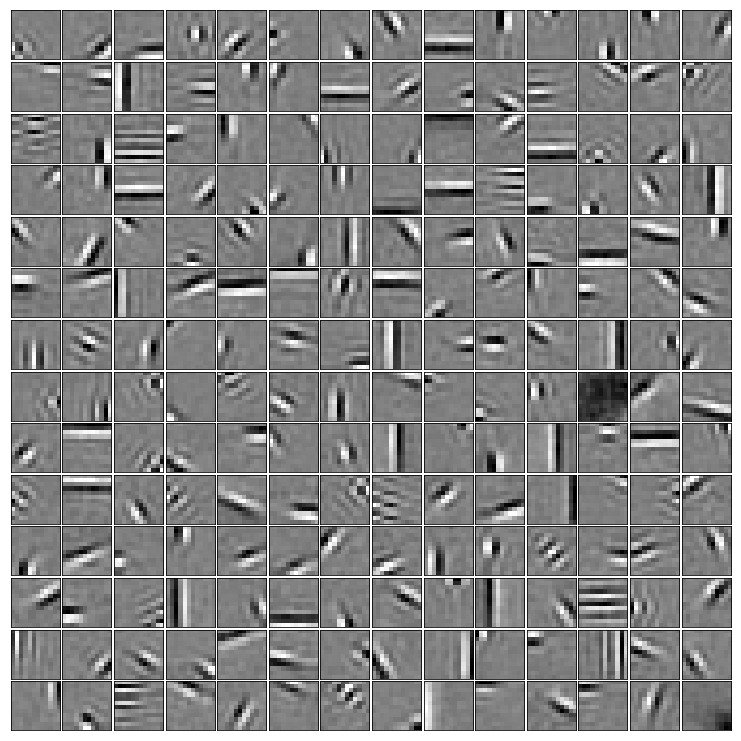

In [7]:
dico = shl.learn_dico()
_ = shl.show_dico(dico)

In [8]:
patches = shl.code(data, dico)
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (204800, 144)
average of patches =  5.24336315367e-05
average energy of patches =  0.927951699814
std of the average of individual patches =  0.000715349325976


In [9]:
code = dico.transform(data)
print('number of patches, size of patches = ', code.shape)
print('average of patches = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

number of patches, size of patches =  (204800, 196)
average of patches =  -0.000132616709878
average energy of patches =  0.783170825632
std of the average of individual patches =  0.00235172676827


In [10]:
V = dico.dictionary
print(code[0,:])
patches = np.dot(code, V)
print(data[0,:], patches[0,:])

[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  4.0433  2.1658 -3.5109  0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 -1.6294  0.      2.5593  0.      0.      0.     -1.8479  0.      0.      0.
  0.      0.      0.      0.     -1.6424  0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.     -2.3568  0.      0.
 -2.082   0.      0.      0.      0.      0.      0.      3.1535  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
 -1.6416  0.      0.      0.      0.      0.      0.      0.      0.     -3.549
  0.      0.     -2.3425  0.      0.      0.      0.      0.      0.      0.
 -3.079   0.      0.      0.      0.      0.      0.     -2.0481  0.      0.
  0.

In [11]:
error = data - patches
print('number of patches, size of patches = ', error.shape)
print('average of patches = ', error.mean())
print('average energy of patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

number of patches, size of patches =  (204800, 144)
average of patches =  -5.24336315367e-05
average energy of patches =  0.356071004614
std of the average of individual patches =  0.000715349325976


TODO: show the reconstruction of the image as in the sklearn example

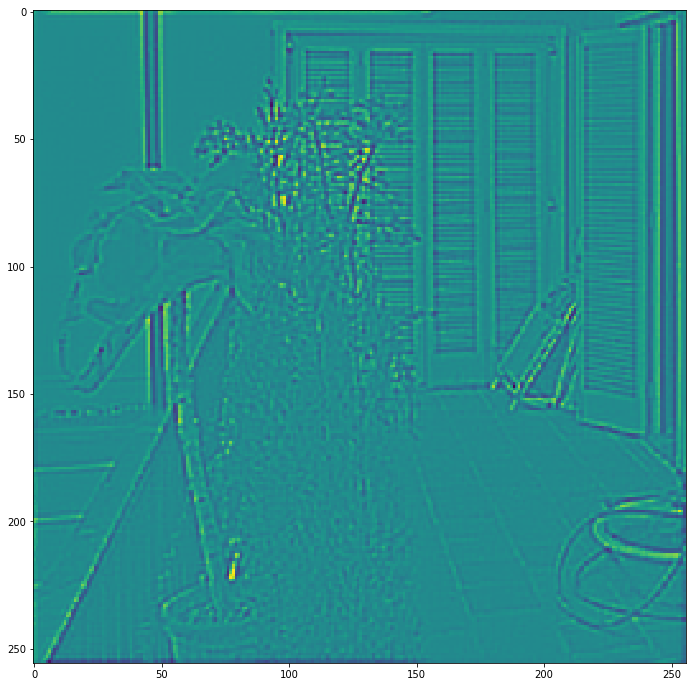

In [12]:
import imageio

image = imageio.imread('database/serre07_distractors/Bda_art1067.jpg')
#http://raw.githubusercontent.com/bicv/SLIP/master/database/yelmo512.png')
image = np.mean(image, axis=-1)
height, width = image.shape

from SLIP import Image

slip = Image({'N_X':height, 'N_Y':width, 
                                        'white_n_learning' : 0,
                                        'seed': None,
                                        'white_N' : .07,
                                        'white_N_0' : .0, # olshausen = 0.
                                        'white_f_0' : .4, # olshausen = 0.2
                                        'white_alpha' : 1.4,
                                        'white_steepness' : 4.,
                                        'do_mask':True})

image = slip.whitening(image)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image);

## Version used

In [13]:
%load_ext version_information
%version_information numpy

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.2.1
OS Darwin 16.4.0 x86_64 i386 64bit
numpy 1.12.0
Thu Feb 09 11:40:36 2017 CET